In [1]:
import os
from dotenv import load_dotenv
from langchain_groq.chat_models import ChatGroq
from langchain_huggingface.chat_models import ChatHuggingFace
load_dotenv()

True

In [2]:
os.environ["HUGGINGFACEHUB_API_TOKEN"] = os.getenv("HUGGINGFACEHUB_API_TOKEN")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [3]:
llm = ChatGroq(model="qwen-qwq-32b")

In [1]:
from langgraph.graph import StateGraph, END
from typing_extensions import TypedDict

# 1. Define State
class MyState(TypedDict):
    input: str
    output: str

# 2. Create Graph
builder = StateGraph(MyState)

# 3. Add simple echo node
def echo_node(state):
    return {"output": f"Echo: {state['input']}"}

builder.add_node("echo", echo_node)
builder.set_entry_point("echo")
builder.add_edge("echo", END)

# 4. Compile
graph = builder.compile()

# 5. Invoke
result = graph.invoke({"input": "Hello LangGraph!"})
print(result)


{'input': 'Hello LangGraph!', 'output': 'Echo: Hello LangGraph!'}


In [3]:
from IPython.display import Image,display

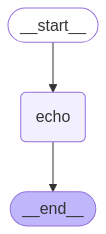

In [5]:
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception as e:
    raise e

In [8]:
class MyState(TypedDict):
    input:str
    output:str

In [9]:
def echo(state:MyState):
    return {"output": f"echo :: {state['input']}"}
    

In [10]:
graph_builder = StateGraph(MyState)

In [11]:
graph_builder.add_node("echo",echo)

In [12]:
from langgraph.graph import START,END
graph_builder.add_edge(START,"echo")
graph_builder.add_edge("echo",END)

In [13]:
graph = graph_builder.compile()

In [14]:
from IPython.display import Image

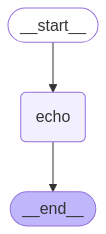

In [16]:
Image(graph.get_graph().draw_mermaid_png())

In [17]:
graph.invoke({"input":"Hello raju"})

{'input': 'Hello raju', 'output': 'echo :: Hello raju'}

In [4]:
from langchain.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_template(
    "You are a helpful assistant. Answer the following: {question}"
)


In [5]:
from langchain.schema.runnable import RunnableMap, RunnablePassthrough
from langchain.schema.output_parser import StrOutputParser

chain = (
    {"question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)


In [6]:
from langgraph.graph import StateGraph, END
from typing_extensions import TypedDict

class MyState(TypedDict):
    question: str
    answer: str

# Graph Builder
builder = StateGraph(MyState)

# Node: Ask LLM
def llm_node(state):
    answer = chain.invoke(state["question"])
    return {"answer": answer}

builder.add_node("ask_llm", llm_node)
builder.set_entry_point("ask_llm")
builder.add_edge("ask_llm", END)

graph = builder.compile()


In [7]:
response = graph.invoke({"question": "Why is the sky blue?"})
print(response["answer"])


<think>
Okay, so I need to figure out why the sky is blue. I remember from school that it has something to do with the way light scatters in the atmosphere. Let me start by recalling what I know.

First, sunlight looks white, but it's actually made up of all the colors of the rainbow. That's why you can see a rainbow when light is split by water droplets, creating a spectrum of colors. Each color has a different wavelength. Red has the longest wavelength, and violet the shortest. But how does that relate to the sky's color?

I think it's called Rayleigh scattering. Maybe that's the key here. So, when sunlight enters the Earth's atmosphere, the gases and particles in the air interact with the light. Since the molecules in the atmosphere are much smaller than the wavelength of visible light, this scattering happens more for shorter wavelengths. That would mean blue and violet, which have shorter wavelengths, are scattered more than red or yellow. But wait, if violet has an even shorter 